In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from keras import backend as K

#Clear TF memory
cfg = K.tf.ConfigProto()
cfg.gpu_options.allow_growth = True
K.set_session(K.tf.Session(config=cfg))

C:\Users\StrikeWade\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
# Load them! 
# cwd = os.getcwd()
# loadpath = cwd + "/Machine Learning Basics model with Tensorflow/data/data4vgg.npz"

loadpath = "../Basic TF & things/data/custom_data.npz"
l = np.load(loadpath)

# See what's in here
print (l.files)
print('')


# Parse data
train_img = l['trainimg']
train_label = l['trainlabel']
test_img = l['testimg']
test_label = l['testlabel']
img_size = l['imgsize']
n_train = train_img.shape[0]
n_class = train_label.shape[1]
dimension = train_img.shape[1]
n_test  = test_img.shape[0]
print ("%d train images loaded" % (n_train))
print ("%d test images loaded" % (n_test))
print ("%d dimensional input" % (dimension))
print ("Image size is %s" % (img_size))
print ("%d classes" % (n_class))

['use_gray', 'testlabel', 'trainlabel', 'testimg', 'trainimg', 'imgsize']

408 train images loaded
273 test images loaded
4096 dimensional input
Image size is [64 64]
4 classes


# Define Params & Network params

In [5]:
tf.set_random_seed(0)
#Params
learning_rate = 0.001
epochs = 200
batch_size = n_train
display_step = 20

#Network Params
n_hidden_1 = 128    #1st layer num features
n_hidden_2 = 128    #2nd layer num features
n_input = dimension #data input dimension
n_classes = n_class

#Placeholder
x = tf.placeholder(dtype=tf.float32, shape=[None, n_input])
y = tf.placeholder(dtype=tf.float32, shape=[None, n_classes])

#Weights & Biases
stddev = 0.1 # <--- This greatly affects accuracy

weights = {
    'h1': tf.Variable(tf.random_normal(shape=[n_input, n_hidden_1], stddev=stddev)),
    'h2': tf.Variable(tf.random_normal(shape=[n_hidden_1, n_hidden_2], stddev=stddev)),
    'out': tf.Variable(tf.random_normal(shape=[n_hidden_2, n_classes], stddev=stddev))
}

biases = {
    'b1': tf.Variable(tf.random_normal(shape=[n_hidden_1])),
    'b2': tf.Variable(tf.random_normal(shape=[n_hidden_2])),
    'out': tf.Variable(tf.random_normal(shape=[n_classes]))
}

# Model function

In [6]:
def multilayer_perceptron(x, weights, biases):
    layer_1 = tf.nn.relu(tf.add(tf.matmul(x, weights['h1']), biases['b1']))
    layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']))
    return tf.matmul(layer_2, weights['out']) + biases['out']

# Define other functions to train and predict

In [7]:
#Construct model
y_pred = multilayer_perceptron(x, weights, biases)

#Define Loss and optimizer function to train, correct_pred and accuracy function to predict
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

correct_pred = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, dtype=tf.float32))

#Define global initialization function
init = tf.global_variables_initializer()

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



# Training Phase

In [10]:
sess = tf.Session()
sess.run(init)

for epoch in range(epochs):
    avg_loss = 0
    total_batch = int(n_train/batch_size)
    
    #Loop over all batches
    for i in range(total_batch):
        random_idx = np.random.randint(n_train, size=batch_size)
        batch_x = train_img[random_idx, :]
        batch_y = train_label[random_idx, :]
        
        #Fit training use batch data
        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
        
        #Compute avg_loss
        avg_loss += sess.run(loss, feed_dict={x: batch_x, y:batch_y}) / total_batch
        
    #Display logs per epoch
    if epoch % display_step == 0:
        print('Epoch: %03d/%03d,    Avg_loss= %04f' % (epoch, epochs, avg_loss))
        train_accuracy = sess.run(accuracy, feed_dict={x: batch_x, y: batch_y})
        test_accuracy = sess.run(accuracy, feed_dict={x: test_img, y: test_label})
        print('-->    Train Accuracy: ', train_accuracy)
        print('-->    Test Accuracy: ', test_accuracy)

print('Final Test Accuracy is: ', test_accuracy)

Epoch: 000/200,    Avg_loss= 1.149504
-->    Train Accuracy:  0.7745098
-->    Test Accuracy:  0.7619048
Epoch: 020/200,    Avg_loss= 0.523934
-->    Train Accuracy:  0.8137255
-->    Test Accuracy:  0.8058608
Epoch: 040/200,    Avg_loss= 0.332105
-->    Train Accuracy:  0.90931374
-->    Test Accuracy:  0.85714287
Epoch: 060/200,    Avg_loss= 0.177357
-->    Train Accuracy:  0.9436275
-->    Test Accuracy:  0.8827839
Epoch: 080/200,    Avg_loss= 0.149488
-->    Train Accuracy:  0.9558824
-->    Test Accuracy:  0.8974359
Epoch: 100/200,    Avg_loss= 0.067559
-->    Train Accuracy:  0.9877451
-->    Test Accuracy:  0.9120879
Epoch: 120/200,    Avg_loss= 0.031452
-->    Train Accuracy:  0.997549
-->    Test Accuracy:  0.9120879
Epoch: 140/200,    Avg_loss= 0.020481
-->    Train Accuracy:  1.0
-->    Test Accuracy:  0.92673993
Epoch: 160/200,    Avg_loss= 0.012902
-->    Train Accuracy:  1.0
-->    Test Accuracy:  0.92673993
Epoch: 180/200,    Avg_loss= 0.007998
-->    Train Accuracy:  1.

In [12]:
test_accuracy = sess.run(accuracy, feed_dict={x: test_img, y: test_label})
test_accuracy

0.92673993

In [30]:
predicted = sess.run(correct_pred, feed_dict={x: test_img, y: test_label})
predicted

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [35]:
predict = sess.run(y_pred, feed_dict={x: test_img, y: test_label})
a = np.argmax(predict, 1)
a

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0,
       0, 0, 1, 3, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 3, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0,
       1, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3,
       2, 0, 0, 0, 0, 0, 0, 3, 0], dtype=int64)

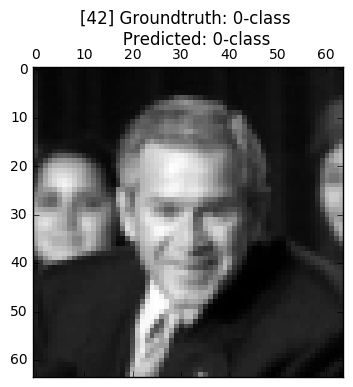

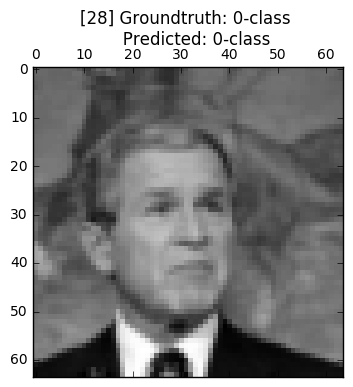

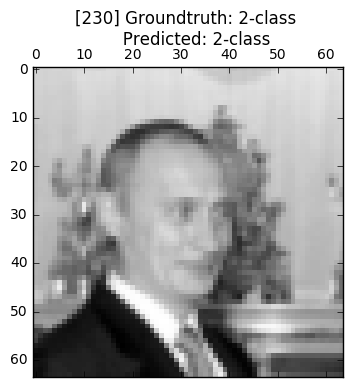

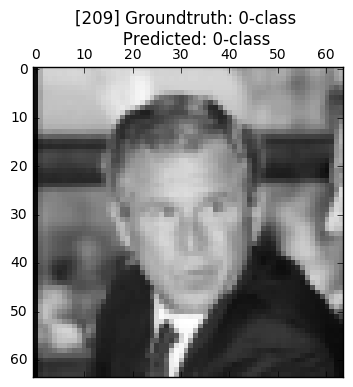

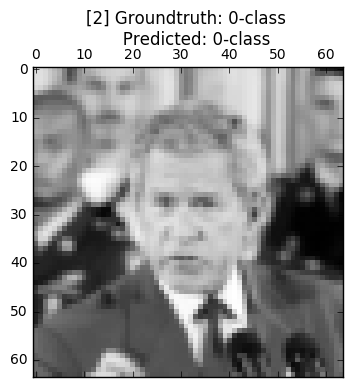

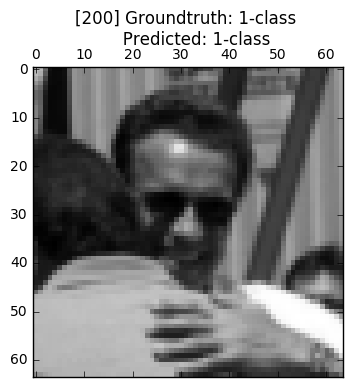

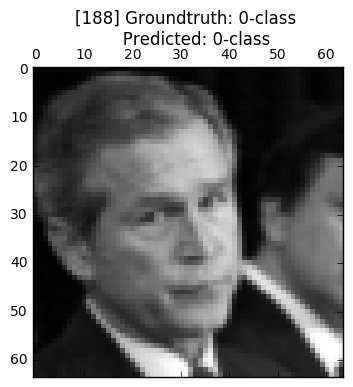

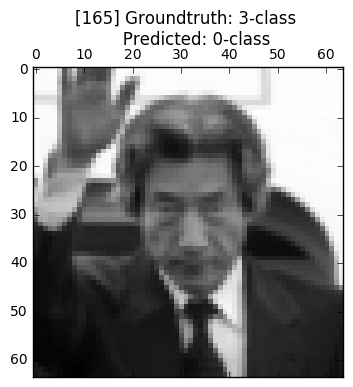

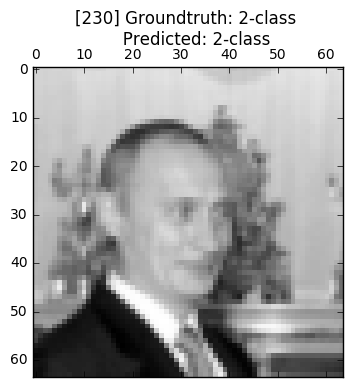

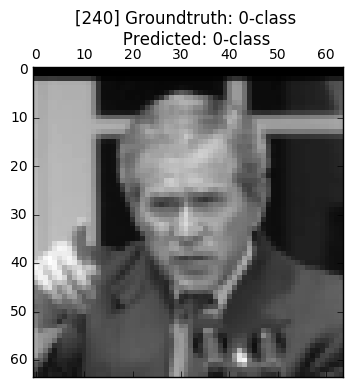

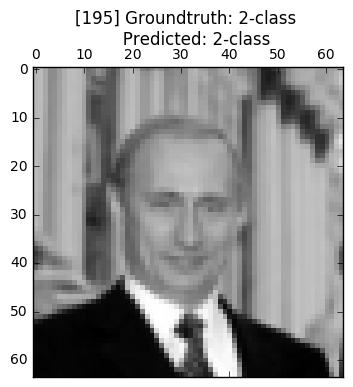

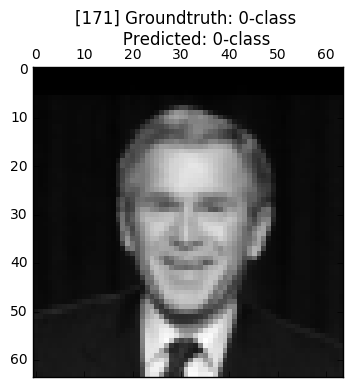

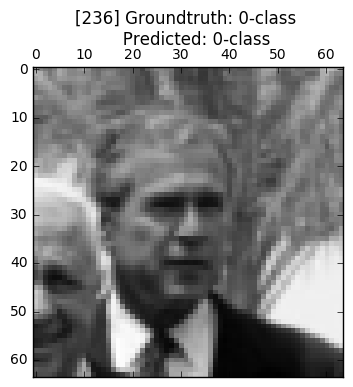

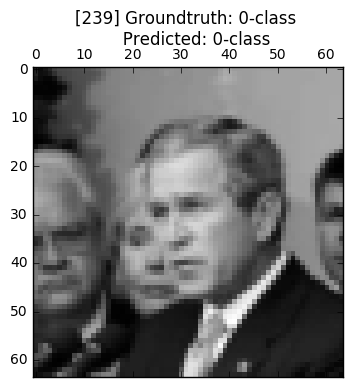

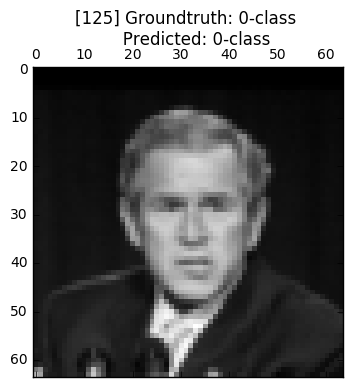

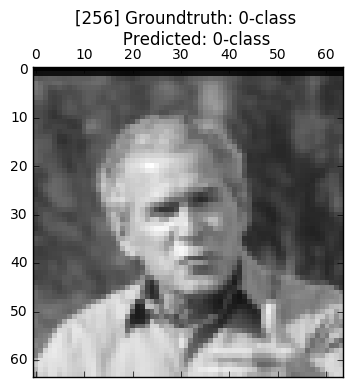

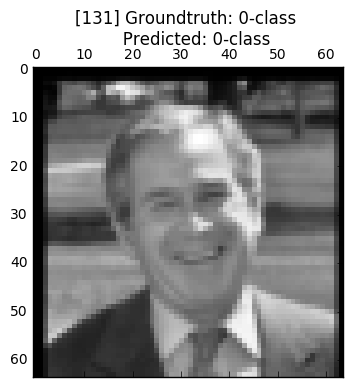

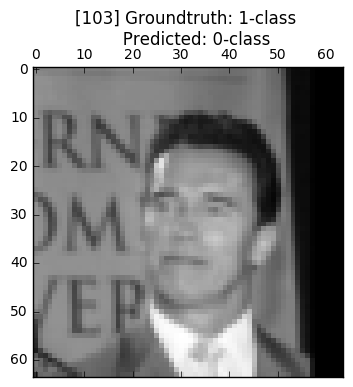

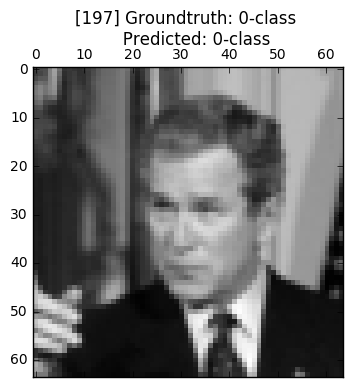

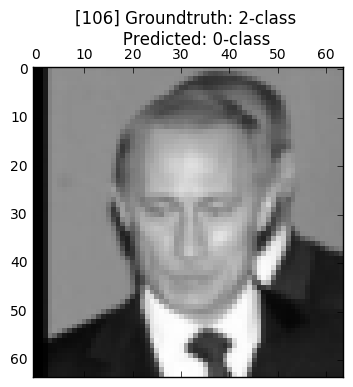

In [44]:
number_test_images = 20
rand_idx = np.random.randint(n_test, size=number_test_images)

predict = sess.run(y_pred, feed_dict={x: test_img, y: test_label})

for i in rand_idx:
    curr_img = np.reshape(test_img[i, :], (img_size[0], -1))
    curr_label_onehot = test_label[i, :]
    curr_label = np.argmax(curr_label_onehot)
    
    curr_predicted_label = np.argmax(predict, 1)
    
    plt.matshow(curr_img, cmap=plt.get_cmap('gray'))
    
    groundtruth_and_predict = '[%d] Groundtruth: %d-class \n   Predicted: %d-class' % (i, curr_label, curr_predicted_label[i])
    plt.title(groundtruth_and_predict)
    plt.show()